In [ ]:
#######################################################################
################## MSDS 458 - Assignment 1 ############################
################## Author: Shawn Liu ##################################
#######################################################################

In [ ]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Model Measurement Function Definition**

In [ ]:
#accuracy
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
#plot confusion matrix (type I and II error)
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

**Load MNIST Digits Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Preprocessing Data**

In [ ]:
###preprocessing the data
###1. labels are to be converted with-one hot encoding
###2. features array are to be reshaped from (28, 28) to (784,)

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [ ]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[1000])) #1000 is arbitrarily picked

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   1   0   0  12 25

In [ ]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)


x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
print(set(x_train_reshaped[10]))

{0, 1, 128, 6, 7, 8, 137, 138, 139, 11, 141, 140, 18, 146, 19, 24, 25, 28, 31, 34, 164, 36, 166, 165, 40, 41, 42, 171, 177, 50, 51, 180, 239, 57, 63, 66, 197, 70, 73, 206, 207, 209, 210, 81, 84, 213, 214, 215, 89, 90, 219, 91, 93, 222, 224, 103, 232, 104, 105, 236, 238, 110, 112, 240, 242, 241, 244, 116, 118, 247, 246, 117, 250, 253, 254}


**Normalize the value per pixel**

In [ ]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [ ]:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


# **Experiment 2. DNN Model - 2 hidden nodes**

In [ ]:
###use Keras to compile DNN model. 

model = Sequential ([
    Dense(input_shape = [784], units=2, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 output_layer (Dense)        (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


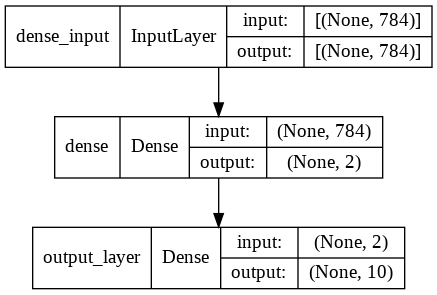

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7531 - accuracy: 0.3862 - val_loss: 1.4874 - val_accuracy: 0.4902
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4326 - accuracy: 0.5152 - val_loss: 1.3364 - val_accuracy: 0.5501
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3267 - accuracy: 0.5557 - val_loss: 1.2616 - val_accuracy: 0.5740
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2658 - accuracy: 0.5730 - val_loss: 1.2120 - val_accuracy: 0.5899
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2135 - accuracy: 0.5993 - val_loss: 1.1880 - val_accuracy: 0.6104
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1706 - accuracy: 0.6230 - val_loss: 1.1295 - val_accuracy: 0.6375
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1422 - accuracy: 0.6324 - val_loss: 1.1050 - val_ac

In [ ]:
###model evaluation

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 1.0783 - accuracy: 0.6431
test set accuracy:  64.31000232696533


In [ ]:
accuracy_list = []
accuracy_list.append(accuracy)

In [ ]:
### making predictions

preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


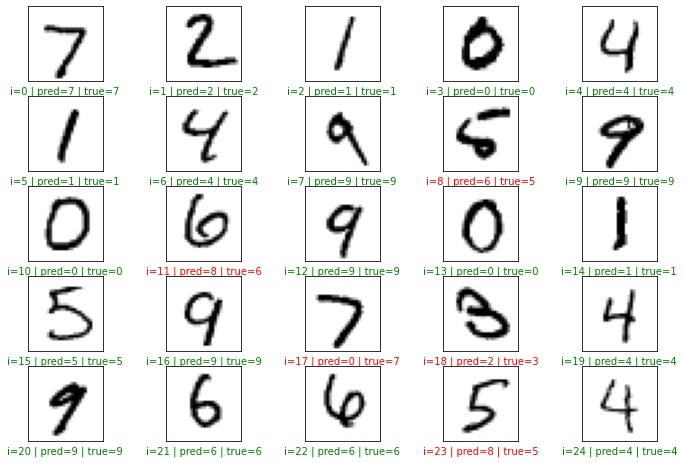

In [ ]:
###Look at the first 25 - Plot test set images along with their predicted and actual labels to understand how the trained model actually performed

plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])   ###np.argmax returns the indices of the maximum values along an axis, which is the digit class with highest possibility
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

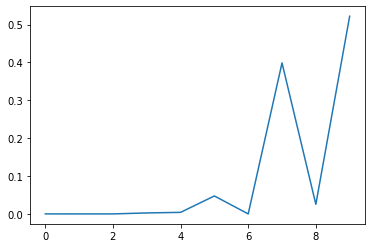

actual is 9


In [ ]:
index = 20

plt.plot(preds[index])
plt.show()

print('actual is {}'.format(np.argmax(y_test_encoded[index])))

In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

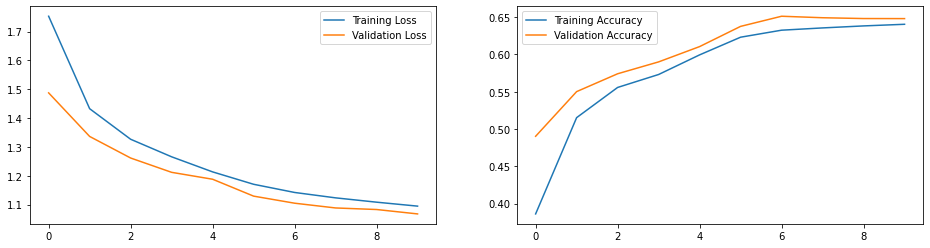

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
pred1= model.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

In [ ]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       980
           1       0.74      0.94      0.83      1135
           2       0.55      0.51      0.53      1032
           3       0.40      0.25      0.31      1010
           4       0.79      0.78      0.79       982
           5       0.38      0.17      0.24       892
           6       0.79      0.86      0.82       958
           7       0.73      0.74      0.74      1028
           8       0.46      0.49      0.47       974
           9       0.74      0.81      0.77      1009

    accuracy                           0.64     10000
   macro avg       0.62      0.64      0.62     10000
weighted avg       0.62      0.64      0.62     10000

Accuracy Score: 0.6431
Root Mean Square Error: 1.992786993132984


In [ ]:
###create confusion matrix

pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes;

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [ ]:
#visualize the prediction result
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,2.10%,0.00%,0.00%,4.57%,0.00%,2.69%,0.00%,89.42%,0.25%,0.98%
1,3.39%,19.49%,54.58%,7.60%,0.09%,5.87%,0.43%,0.36%,7.96%,0.24%
2,0.24%,73.11%,19.47%,0.81%,0.10%,1.05%,2.86%,0.03%,2.26%,0.06%
3,65.00%,0.00%,1.67%,27.27%,0.00%,2.78%,0.00%,2.66%,0.60%,0.03%
4,0.00%,0.00%,0.09%,0.14%,54.72%,4.28%,9.61%,0.65%,14.14%,16.36%
5,0.24%,73.11%,19.47%,0.81%,0.10%,1.05%,2.86%,0.03%,2.26%,0.06%
6,0.00%,0.00%,0.00%,0.01%,72.81%,0.71%,0.51%,0.31%,2.58%,23.07%
7,0.02%,0.00%,0.23%,0.78%,26.57%,12.46%,1.30%,3.12%,27.00%,28.53%
8,0.00%,0.10%,0.16%,0.05%,32.98%,1.43%,55.27%,0.10%,6.35%,3.55%
9,0.00%,0.00%,0.00%,0.04%,1.08%,2.04%,0.00%,21.22%,1.40%,74.21%


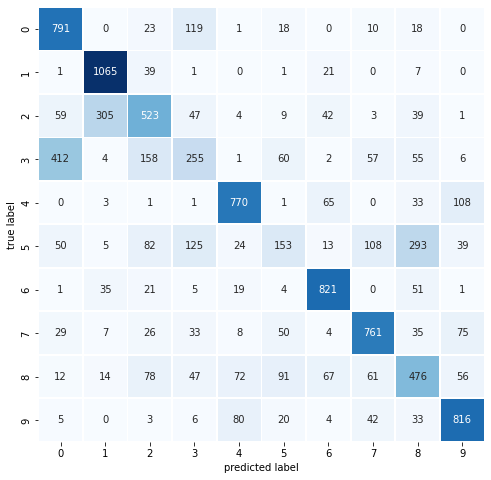

In [ ]:
#visualize the confusion matrix

plot_confusion_matrix(y_test,pred_classes)

15 threes are misclassified as 2, 22 nines are misclassified as 4, 18 sevens miscalssified as 9

In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

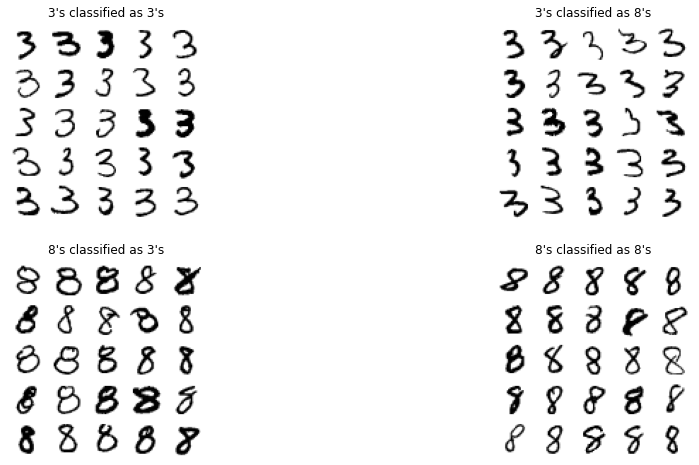

In [ ]:
cl_a, cl_b = 3, 8
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]# misclassified 
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]# misclassified
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

#**Analyzing the Activation Values of the Hidden Nodes**

We want to examine the contribution of the individual hidden nodes to the classifications made by the model. We first get the activation values of all the hidden nodes for each of the 60,000 training images and treat these 128 activations as the features that determine the classification class. For the sake of comparison, we also consider the 784 pixels of each training image and determine the contribution of the individual pixels to the predicted classification class.

Our goal is to use box and scatter plots to visualize how these features (pixel and activation values) correlate with the class labels. Because of the high dimension of the feature spaces, we apply PCA decomposition and t-Distributed stochastic neighbor embedding (t-SNE) to reduce the number of features in each case.

1) Raw data is 60,000 X 784. Just do a scatter plot of col 1 vs col 2. Overlay the color coded classes. We should not see any patterns since there is not much info in 2 cols to discriminate.

2) PCA of raw data – as we discussed earlier. Plot PC1 vs PC2 with overlay. This should be ‘better’ since these 2 capture the info from all 784 cols.

3) PCA of activation values – as we discussed earlier. This should be ‘better’ than the previous 2 since it has captured specific features of discrimination.

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0] ###the 128 nodes hidden layer
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 2)

In [ ]:
output_layer_activations.shape

(60000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 17.609895706176758


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.277 0.    0.108 0.356 0.    0.136 0.    0.049 0.069 0.005]
The sum of the probabilities is (approximately) 1.0000001192092896


In [ ]:
###create matrix, with activation values and class labels

#Get the dataframe of all the node values
activation_data = {'actual_class':y_train} #initiate dictionary with actual label as 1st element 
for k in range(0,2): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k] #The string itself can be formatted in much the same way that you would with str.format()

#hidden_layer_activation[:,k] returns the vector of one specific neuron in hidden layer for all instances

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.0,9.000,2.000,1.0,3.000,1.0,4.000,3.000,5.000,3.000,6.000,1.0
act_val_0,0.617,0.000,3.675,0.0,7.450,0.000,0.0,0.420,0.0,5.533,0.000,0.344,0.000,3.509,0.0
act_val_1,3.592,6.049,2.794,0.0,5.952,2.589,0.0,4.264,0.0,1.876,5.117,1.316,3.409,0.000,0.0


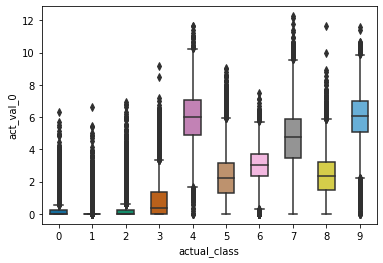

In [ ]:
### visualize activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

 #https://stackoverflow.com/questions/47551251/python-pandas-groupby-apply-lambda-arguments

,actual_class,range_of_act_values
0,0,"[0.0, 6.32]"
1,1,"[0.0, 6.6]"
2,2,"[0.0, 6.94]"
3,3,"[0.0, 9.15]"
4,4,"[0.0, 11.65]"
5,5,"[0.0, 9.07]"
6,6,"[0.0, 7.49]"
7,7,"[0.0, 12.24]"
8,8,"[0.0, 11.64]"
9,9,"[0.0, 11.59]"


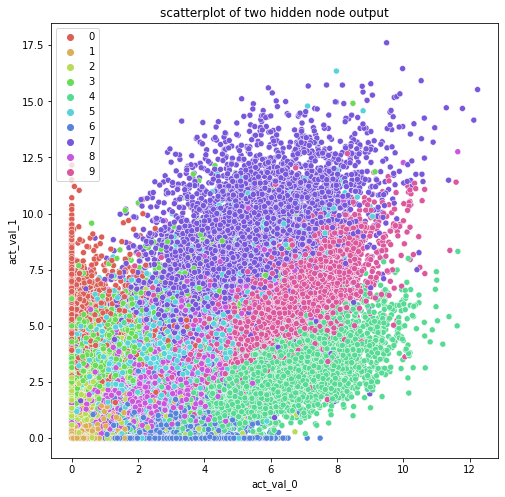

In [ ]:
#Use a scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image, i.e. how well the pixel values at two fixed locations in the image "predict" the class labels.

plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="act_val_0", y="act_val_1", hue="actual_class",  palette=color, data = activation_df, legend="full")
plt.legend(loc='upper left')
plt.title('scatterplot of two hidden node output');
##we can tell that the two pixels do not have a good prediction power on the label identification

# **Experiment 3. DNN Model - more hidden nodes**

In this experiment, i am proposing to use hyperparameter tunning to try to find  the optimal number of hidden nodes within same model structure

In [ ]:
# # Use scikit-learn to grid search the batch size and epochs
# import numpy
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Activation
# from keras.wrappers.scikit_learn import KerasClassifier

# # Function to create model, required for KerasClassifier
# def create_model(layers, activation):
#   model = Sequential()
#   for i, nodes in enumerate(layers):
#     if i == 0:
#       model.add(Dense(nodes, input_dim = 784, kernel_regularizer=tf.keras.regularizers.L2(0.001)))
#       model.add(Activation(activation))
#     else:
#       model.add(Dense(nodes))
#       model.add(Activation(activation))
#   #last layer
#   model.add(Dense(name = 'output_layer', units=10, activation=tf.nn.softmax))

#   model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#   return model
	

In [ ]:
# model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# layers = [[196], [392],[532]] # ->number of nodes in hidden layer
# #The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
# activation = ['relu']

# param_grid = dict(layers=layers, activation=activation, epochs = [200], callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)])

# grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=5)

# grid_result = grid.fit(x_train_norm, y_train_encoded)

Gridserach has turned to be so time-consuming, so switch back to mannual experiment to try to find the optimal number of hidden nodes

1.196
2.392
3.532

In [ ]:
###use Keras to compile DNN model. 196 hidden nodes

model1 = Sequential ([
    Dense(input_shape = [784], units=196, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 196)               153860    
                                                                 
 output_layer (Dense)        (None, 10)                1970      
                                                                 
Total params: 155,830
Trainable params: 155,830
Non-trainable params: 0
_________________________________________________________________


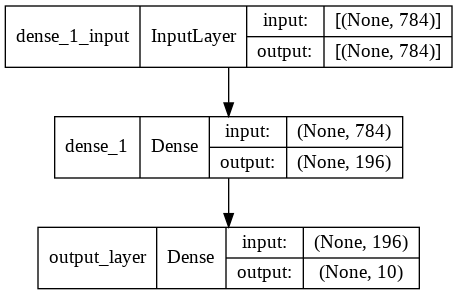

In [ ]:
keras.utils.plot_model(model1, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model1.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3965 - accuracy: 0.9215 - val_loss: 0.2480 - val_accuracy: 0.9522
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2330 - accuracy: 0.9540 - val_loss: 0.2019 - val_accuracy: 0.9619
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1985 - accuracy: 0.9604 - val_loss: 0.1792 - val_accuracy: 0.9669
Epoch 4/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1812 - accuracy: 0.9639 - val_loss: 0.1886 - val_accuracy: 0.9617
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1721 - accuracy: 0.9664 - val_loss: 0.1673 - val_accuracy: 0.9684
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1654 - accuracy: 0.9672 - val_loss: 0.1875 - val_accuracy: 0.9622
Epoch 7/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1611 - accuracy: 0.9700 - val_loss: 0.1846 - val_ac

In [ ]:
###model evaluation

loss, accuracy1 = model1.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1617 - accuracy: 0.9677
test set accuracy:  64.31000232696533


In [ ]:
accuracy_list.append(accuracy1)

In [ ]:
### making predictions

preds = model1.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

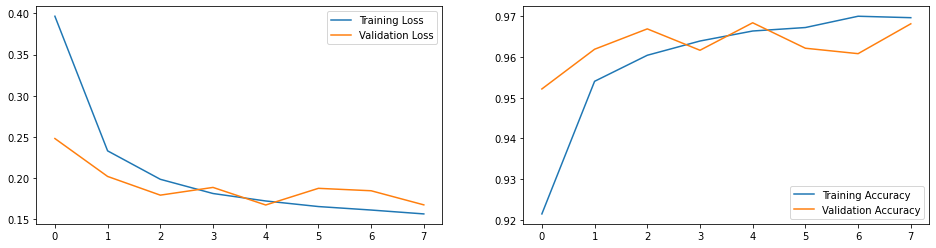

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
###use Keras to compile DNN model. 392 hidden nodes (1/2 of total input nodes)

model2 = Sequential ([
    Dense(input_shape = [784], units=392, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 392)               307720    
                                                                 
 output_layer (Dense)        (None, 10)                3930      
                                                                 
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________


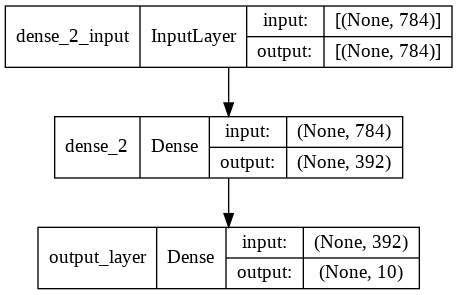

In [ ]:
keras.utils.plot_model(model2, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model2.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4081 - accuracy: 0.9237 - val_loss: 0.2443 - val_accuracy: 0.9555
Epoch 2/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2342 - accuracy: 0.9544 - val_loss: 0.2106 - val_accuracy: 0.9585
Epoch 3/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2070 - accuracy: 0.9592 - val_loss: 0.1927 - val_accuracy: 0.9616
Epoch 4/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1936 - accuracy: 0.9622 - val_loss: 0.2029 - val_accuracy: 0.9614
Epoch 5/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1846 - accuracy: 0.9645 - val_loss: 0.1869 - val_accuracy: 0.9639
Epoch 6/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1782 - accuracy: 0.9659 - val_loss: 0.1832 - val_accuracy: 0.9634
Epoch 7/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1708 - accuracy: 0.9680 - val_loss: 0.1784 -

In [ ]:
###model evaluation

loss, accuracy2 = model2.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1929 - accuracy: 0.9564
test set accuracy:  64.31000232696533


In [ ]:
accuracy_list.append(accuracy2)

In [ ]:
### making predictions

preds = model2.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

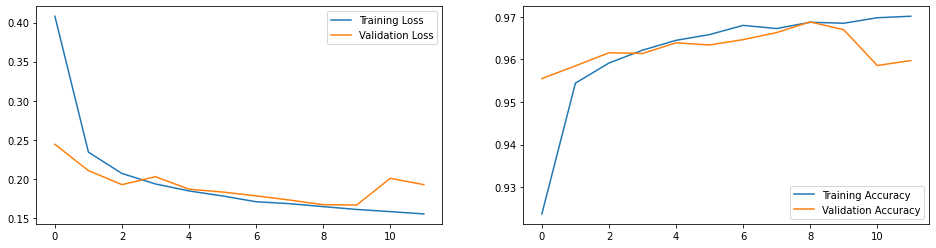

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
###use Keras to compile DNN model. 532 hidden nodes (2/3 of total input nodes 784)

model3 = Sequential ([
    Dense(input_shape = [784], units=532, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 532)               417620    
                                                                 
 output_layer (Dense)        (None, 10)                5330      
                                                                 
Total params: 422,950
Trainable params: 422,950
Non-trainable params: 0
_________________________________________________________________


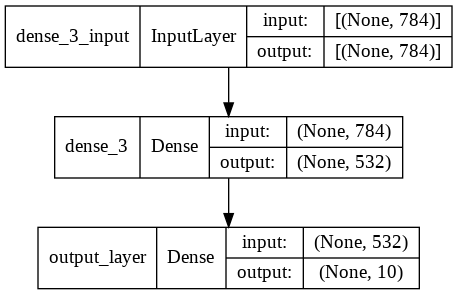

In [ ]:
keras.utils.plot_model(model3, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model3.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4130 - accuracy: 0.9244 - val_loss: 0.2457 - val_accuracy: 0.9568
Epoch 2/200
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2407 - accuracy: 0.9536 - val_loss: 0.2165 - val_accuracy: 0.9599
Epoch 3/200
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2164 - accuracy: 0.9579 - val_loss: 0.1949 - val_accuracy: 0.9643
Epoch 4/200
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2026 - accuracy: 0.9607 - val_loss: 0.1883 - val_accuracy: 0.9652
Epoch 5/200
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1921 - accuracy: 0.9629 - val_loss: 0.1949 - val_accuracy: 0.9628
Epoch 6/200
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1824 - accuracy: 0.9657 - val_loss: 0.1931 - val_accuracy: 0.9621
Epoch 7/200
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1759 - accuracy: 0.9661 - val_loss: 0.1826 -

In [ ]:
###model evaluation

loss, accuracy3 = model3.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 4ms/step - loss: 0.1791 - accuracy: 0.9658
test set accuracy:  64.31000232696533


In [ ]:
accuracy_list.append(accuracy3)

In [ ]:
### making predictions

preds = model3.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

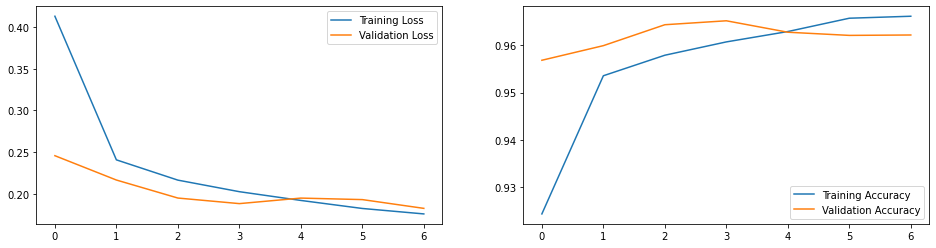

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
###use Keras to compile DNN model. 28 hidden nodes (2/3 of total input nodes 784)

model4 = Sequential ([
    Dense(input_shape = [784], units=28, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28)                21980     
                                                                 
 output_layer (Dense)        (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


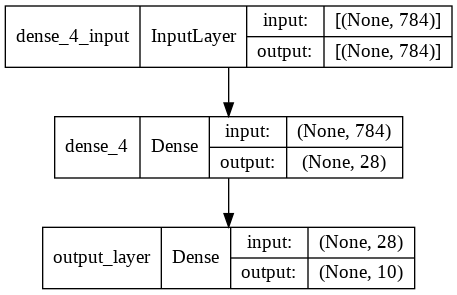

In [ ]:
keras.utils.plot_model(model4, "mnist_model.png", show_shapes=True) 

In [ ]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model4.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
###training the model


history = model4.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4562 - accuracy: 0.8860 - val_loss: 0.3130 - val_accuracy: 0.9301
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3020 - accuracy: 0.9291 - val_loss: 0.2718 - val_accuracy: 0.9389
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9385 - val_loss: 0.2430 - val_accuracy: 0.9455
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2422 - accuracy: 0.9446 - val_loss: 0.2338 - val_accuracy: 0.9499
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2262 - accuracy: 0.9490 - val_loss: 0.2164 - val_accuracy: 0.9530
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9519 - val_loss: 0.2227 - val_accuracy: 0.9503
Epoch 7/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2057 - accuracy: 0.9541 - val_loss: 0.2083 - val_ac

In [ ]:
###model evaluation

loss, accuracy4 = model4.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1928 - accuracy: 0.9547
test set accuracy:  64.31000232696533


In [ ]:
accuracy_list.append(accuracy4)

In [ ]:
### making predictions

preds = model4.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [ ]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

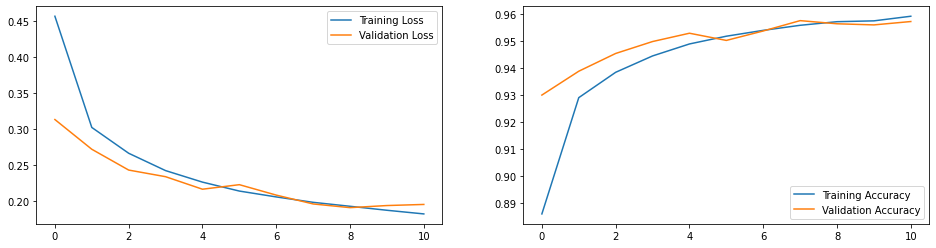

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [ ]:
### show 

accuracy_list.append(0.9673)
hidden_nodes = [2, 196, 392, 532, 28, 128]

accuracy_dic = {'hidden_nodes': hidden_nodes, 'accuracy': accuracy_list}

accuracy_df = pd.DataFrame(accuracy_dic, columns=['hidden_nodes', 'accuracy'])

In [ ]:
accuracy_df = accuracy_df.sort_values(by=['accuracy'])

accuracy_df

,hidden_nodes,accuracy
0,2,0.6431
4,28,0.9547
2,392,0.9564
3,532,0.9658
5,128,0.9673
1,196,0.9677


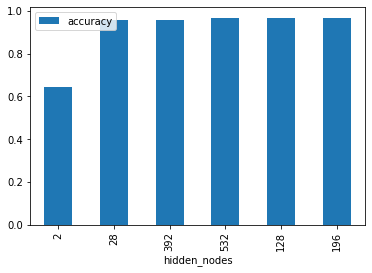

In [ ]:
accuracy_df.plot.bar(x='hidden_nodes', y='accuracy')

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%%shell
jupyter nbconvert --to html /content/Assignment1_Experiment2_3_Liu.ipynb

[NbConvertApp] Converting notebook /content/Assignment1_Experiment2_3_Liu.ipynb to html
[NbConvertApp] Writing 1527491 bytes to /content/Assignment1_Experiment2_3_Liu.html


In [3]:
%%shell
jupyter nbconvert --to html /content/Assignment1_Experiment4_5_Liu.ipynb

[NbConvertApp] Converting notebook /content/Assignment1_Experiment4_5_Liu.ipynb to html
[NbConvertApp] Writing 918997 bytes to /content/Assignment1_Experiment4_5_Liu.html


In [4]:
%%shell
jupyter nbconvert --to html /content/Assignment1_Experiment1_Liu.ipynb

[NbConvertApp] Converting notebook /content/Assignment1_Experiment1_Liu.ipynb to html
[NbConvertApp] Writing 3040862 bytes to /content/Assignment1_Experiment1_Liu.html
